# Data Exploration

In [38]:
import pandas as pd
import numpy as np 
import librosa
import matplotlib.pyplot as plt

## Load Datasets

In [3]:
data_3 = pd.read_csv('Data/features_3_sec.csv')

In [4]:
data_30 = pd.read_csv('Data/features_30_sec.csv')

## Sample Audio Exploration & Visualization

In [8]:
# Looking at sound (sequence of vibrations of varying pressure strengths)  
# Looking at sample rate (# of audio samples per sec in Hz) 

y, sample_rate = librosa.load('Data/genres_examples/blues.00000.wav')

print('y: ', y)
print('Sample Rate (Hz): ', sample_rate) 

y:  [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
Sample Rate (Hz):  22050


In [9]:
# Trim silences at beginning and end of audio
audio_file, _ = librosa.effects.trim(y=y)

print('Audio File: ', audio_file)

Audio File:  [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]


Text(0.5, 1.0, 'Waveform of Blues #0')

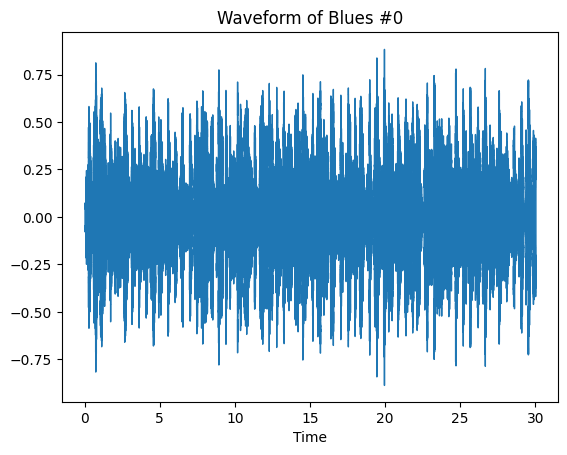

In [14]:
# 2-D representation of waveform

librosa.display.waveshow(y=audio_file, sr=sample_rate)
plt.title("Waveform of Blues #0")

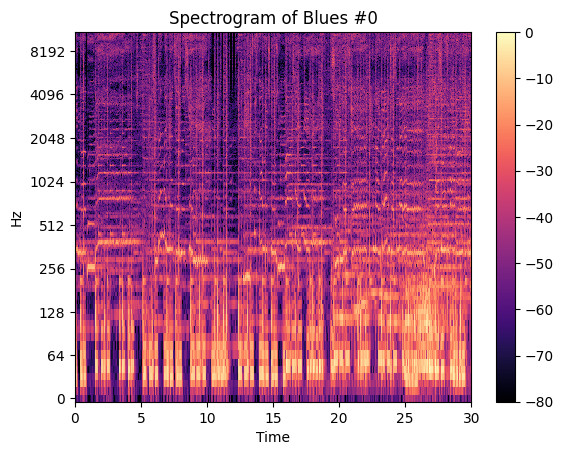

In [37]:
# Plotting spectrogram

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref = np.max)
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
plt.title("Spectrogram of Blues #0")
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Mel Spectrogram of Blues #0')

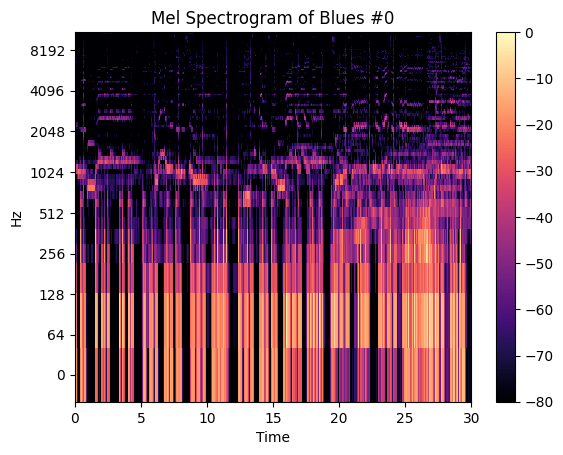

In [36]:
# Mel Spectrogram (Mel Scale on y-axis of spectrogram)

S = librosa.feature.melspectrogram(y=y, sr=sample_rate)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Mel Spectrogram of Blues #0")

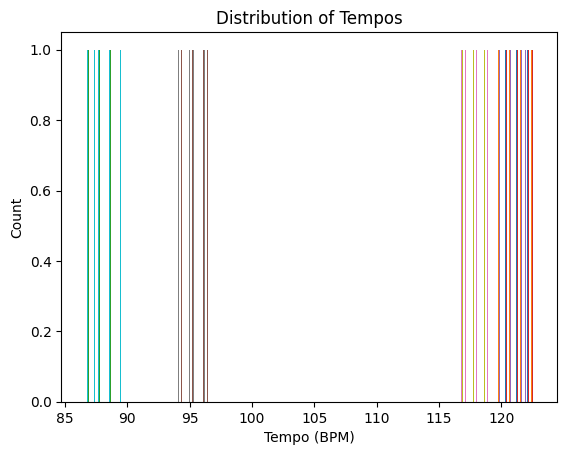

Bin edges: [ 86.1328125   89.82421875  93.515625    97.20703125 100.8984375
 104.58984375 108.28125    111.97265625 115.6640625  119.35546875
 123.046875  ]


In [26]:
# Looking at distribution of tempos for the different genres

import os

tempo_values = []

for i in range(10):
    genre_path = 'Data/genres_examples'
    for file in os.listdir(genre_path):
        if file.endswith('.wav'):
            file_path = os.path.join(genre_path, file)
            y, sr = librosa.load(file_path, sr=None)
            tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
            tempo_values.append(tempo)


n, bins, _ = plt.hist(tempo_values, bins=10)
plt.title('Distribution of Tempos')
plt.xlabel("Tempo (BPM)")
plt.ylabel("Count")
plt.show()

print(f"Bin edges: {bins}")

## 30-sec Dataset Exploration & Preprocessing

In [29]:
data_30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [31]:
data_30.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [44]:
data_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   1000 non-null   int64  
 1   chroma_stft_mean         1000 non-null   float64
 2   chroma_stft_var          1000 non-null   float64
 3   rms_mean                 1000 non-null   float64
 4   rms_var                  1000 non-null   float64
 5   spectral_centroid_mean   1000 non-null   float64
 6   spectral_centroid_var    1000 non-null   float64
 7   spectral_bandwidth_mean  1000 non-null   float64
 8   spectral_bandwidth_var   1000 non-null   float64
 9   rolloff_mean             1000 non-null   float64
 10  rolloff_var              1000 non-null   float64
 11  zero_crossing_rate_mean  1000 non-null   float64
 12  zero_crossing_rate_var   1000 non-null   float64
 13  harmony_mean             1000 non-null   float64
 14  harmony_var              

In [41]:
data_30 = data_30.drop(labels='filename', axis=1)

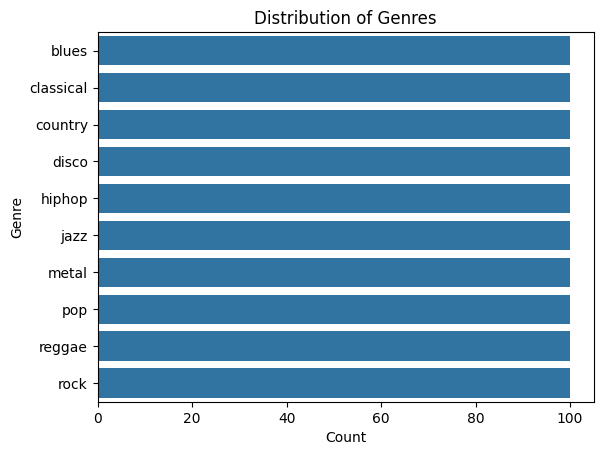

In [49]:
import seaborn as sns

# Visualize genre distribution

sns.countplot(y='label', data=data_30, order=data_30['label'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Genres')
plt.show()

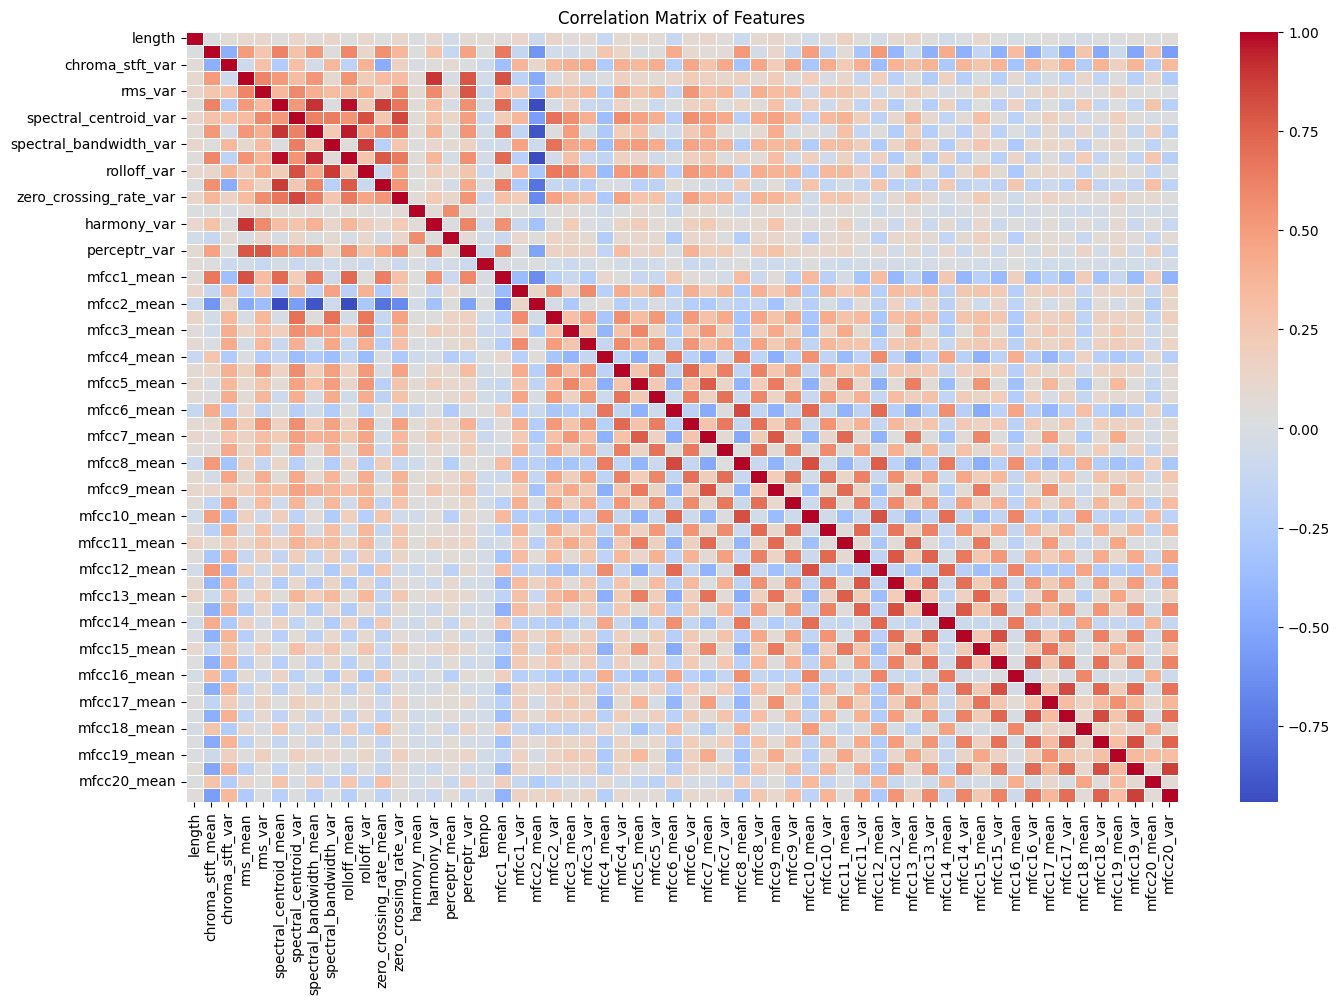

In [54]:
# Compute the correlation matrix
corr = data_30.drop(columns=['label']).corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

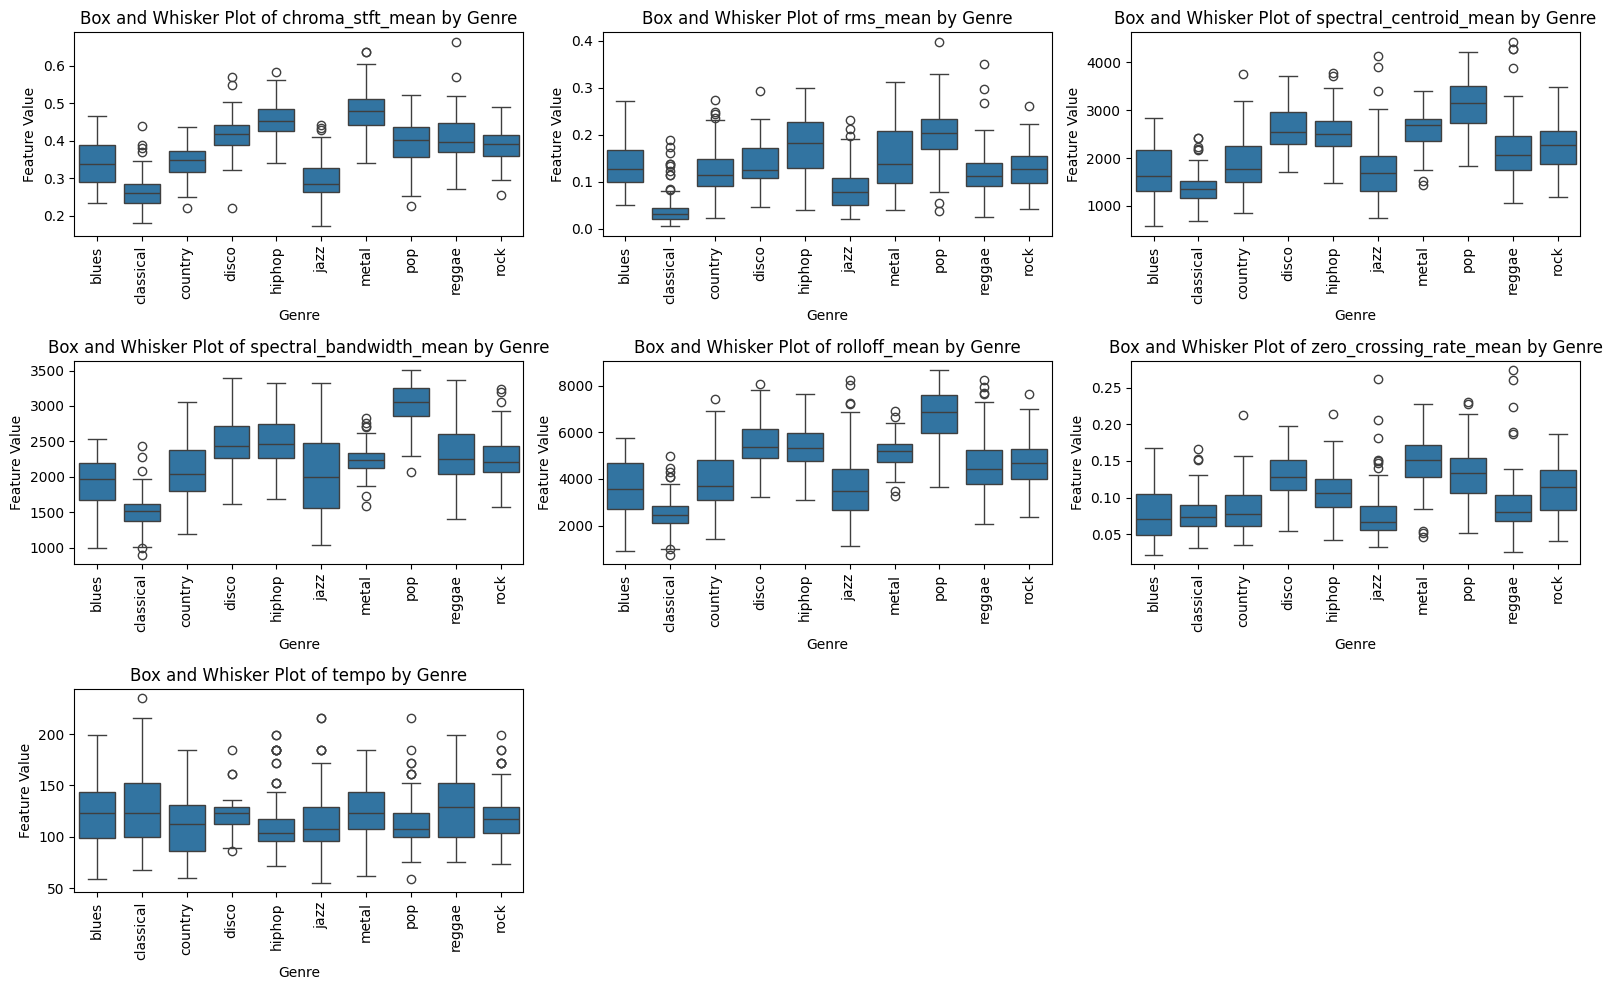

In [75]:
# Key Features

key_features = ['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean', 'tempo']

plt.figure(figsize=(16, 10))

# Box and whisker plots for each key feature by genre
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='label', y=feature, data=data_30)
    plt.xlabel('Genre')
    plt.ylabel('Feature Value')
    plt.title(f'Box and Whisker Plot of {feature} by Genre')
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Selecting target column as music genre
X = data_30.drop(columns=['label'])
y = data_30['label']

# Standardize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

## Building ML Models

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2)

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def model_eval(model, title):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Eval
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       1.00      0.82      0.90        17
           2       0.52      0.81      0.63        16
           3       0.76      0.68      0.72        19
           4       0.87      0.62      0.72        21
           5       0.83      0.95      0.89        21
           6       0.68      0.94      0.79        16
           7       0.85      0.82      0.84        28
           8       0.56      0.74      0.64        19
           9       0.33      0.17      0.22        18

    accuracy                           0.74       200
   macro avg       0.73      0.74      0.72       200
weighted avg       0.75      0.74      0.73       200


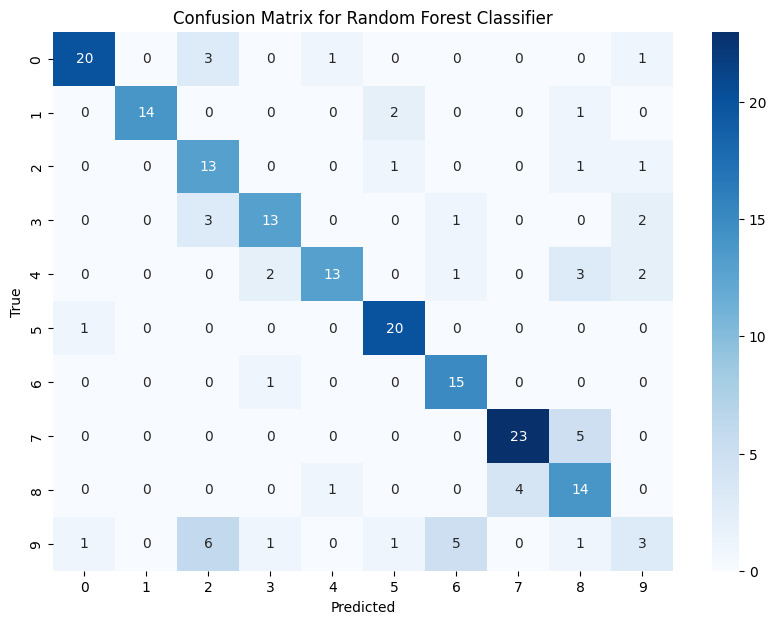

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
model_eval(clf, "Random Forest Classifier")